In [1]:
import os
import sys
import warnings
import platform

# Basic Data Analysis Tools
import numpy as np
import pandas as pd
from scipy import stats

# Exploratory Data Analysis (EDA)
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100


In [3]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')

In [4]:
# ['피앤이솔루션.xlsx', '엘앤에프.xlsx', '이엔에프테크놀로지.xlsx', '코스모신소재.xlsx', '씨아이에스.xlsx']

In [5]:
company = '씨아이에스'

In [6]:
data = pd.read_csv('data_1_{}.csv'.format(company), encoding='euc-kr', engine='python', index_col=0)

In [7]:
# data = pd.read_csv('data_씨아이에스_20.csv', thousands=',' ,index_col=0, encoding='utf-16')
data.head()

,Date,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,adjusted_EPS,price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,%change_mineral,major_mineral,major_change_mineral,major_%chagne_mineral,price_co_lithum,change_co_lithum,%change_co_lithum,price_cobalt_LME,change_cobalt_LME,%change_cobalt_LME,price_cobalt_rotterdam,change_cobalt_rotterdam,%change_cobalt_rotterdam,kospi,kosdaq,last_usd_krw,open_usd_krw,high_usd_krw,low_usd_krw,%change_usd_krw,last_korean_bond,open_korean_bond,high_korean_bond,low_korean_bond,%change_korean_bond,last_kospi_vol,open_kospi_vol,high_kospi_vol,low_kospi_vol,%change_kospi_vol,last_brent,open_brent,high_brent,low_brent,volume_brent,%change_brent,last_wti,open_wti,high_wti,low_wti,volume_wti,%change_wti,rsi_14,macd,cci,adx,stoch_slowk,stoch_slowd,willr,momentum,roc,ema20,adosc,obv,event1,event2,event3,event4,event5,event6,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150
0,2010-01-11,24045185.0,14580313.0,28735454.0,NaN,NaN,NaN,6836614.0,5891293.0,8727267.0,222.23,138.32,18300.0,175.0,0.97,159792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,540.40,1694.12,1120.50,1124.70,1125.4,1115.40,-0.69,4.840,4.840,4.840,4.840,-1.43,NaN,NaN,NaN,NaN,NaN,80.97,81.53,82.45,80.41,137.69,-0.49,82.52,82.88,83.95,81.96,296.30,-0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.144804,-0.039180,-0.036545,0.033332,-0.010435,-0.001088,0.022977,-0.090904,0.042332,-0.012466,-0.154154,-0.207489,-0.019969,-0.161041,-0.099533,-0.115672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-12,24045185.0,14580313.0,28735454.0,NaN,NaN,NaN,6836614.0,5891293.0,8727267.0,222.23,138.32,17765.0,-535.0,-2.92,159726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.11,1698.64,1120.75,1119.70,1127.3,1117.30,0.02,4.860,4.860,4.860,4.860,0.41,NaN,NaN,NaN,NaN,NaN,79.30,80.55,80.86,78.49,149.36,-2.06,80.79,82.07,82.34,79.91,333.87,-2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.070792,0.063178,0.028834,0.131254,0.074361,0.083712,0.101119,-0.013229,0.101959,0.043821,-0.097684,-0.171642,0.060432,-0.154362,-0.018807,-0.071966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-13,24045185.0,14580313.0,28735454.0,NaN,NaN,NaN,6836614.0,5891293.0,8727267.0,222.23,138.32,17735.0,-30.0,-0.17,159648.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.46,1671.41,1123.00,1120.75,1130.6,1118.80,0.20,4.820,4.820,4.820,4.820,-0.82,NaN,NaN,NaN,NaN,NaN,78.31,78.49,79.09,77.04,105.59,-1.25,79.65,80.06,80.67,78.37,401.63,-1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073607,0.076268,0.041688,0.188937,0.074965,0.055785,0.057590,0.027561,0.148355,0.007852,-0.013603,-0.107155,0.117566,-0.091479,0.067659,-0.032910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-14,24045185.0,14580313.0,28735454.0,NaN,NaN,NaN,6836614.0,5891293.0,8727267.0,222.23,138.32,18350.0,615.0,3.47,161550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542.33,1685.77,1123.00,1122.50,1123.9,1118.40,0.00,4.775,4.775,4.775,4.775,-0.93,NaN,NaN,NaN,NaN,NaN,77.82,78.55,78.98,77.49,22.48,-0.63,79.39,79.63,80.36,78.92,275.40,-0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102128,0.220774,0.215662,0.298658,0.212121,0.213876,0.242790,0.143532,0.276082,0.181676,0.078864,-0.040092,0.241608,0.001869,0.179814,0.088941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-15,24045185.0,14580313.0,28735454.0,NaN,NaN,NaN,6836614.0,5891293.0,8727267.0,222.23,138.32,18325.0,-25.0,-0.14,161994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.25,1.25,5.68,549.97,1701.80,1123.50,1123.00,1125.3,1120.86,0.04,4.775,4.775,4.775,4.775,0.00,NaN,NaN,NaN,NaN,NaN,77.11,78.35,78.35,76.81,144.80,-0.91,78.00,79.20,79.31,77.70,200.56,-1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.159713,0.246575,0.238641,0.35309

In [8]:
data.set_index('Date', inplace=True)

In [9]:
null_data = data.isnull().sum() / len(data) * 100
null_data

asset(1000)                  0.000000
debt(1000)                   0.000000
sales(1000)                  0.000000
adjusted_price              56.887444
volumne(mean_5d)(week)      56.887444
volumne(week)               56.887444
profit(1000)                 0.000000
term_profit(1000)            0.000000
gross_margin(1000)           0.000000
adjusted_BPS                 0.000000
adjusted_EPS                 0.000000
price_nickel                 2.600569
change_nickel                2.600569
%change_nickel               2.600569
stock_nickel                 2.600569
index_mineral               11.783828
change_mineral              11.783828
%change_mineral             11.783828
major_mineral               11.743194
major_change_mineral        11.743194
major_%chagne_mineral       11.743194
price_co_lithum              8.939456
change_co_lithum             8.939456
%change_co_lithum            8.939456
price_cobalt_LME            11.865095
change_cobalt_LME           11.865095
%change_coba

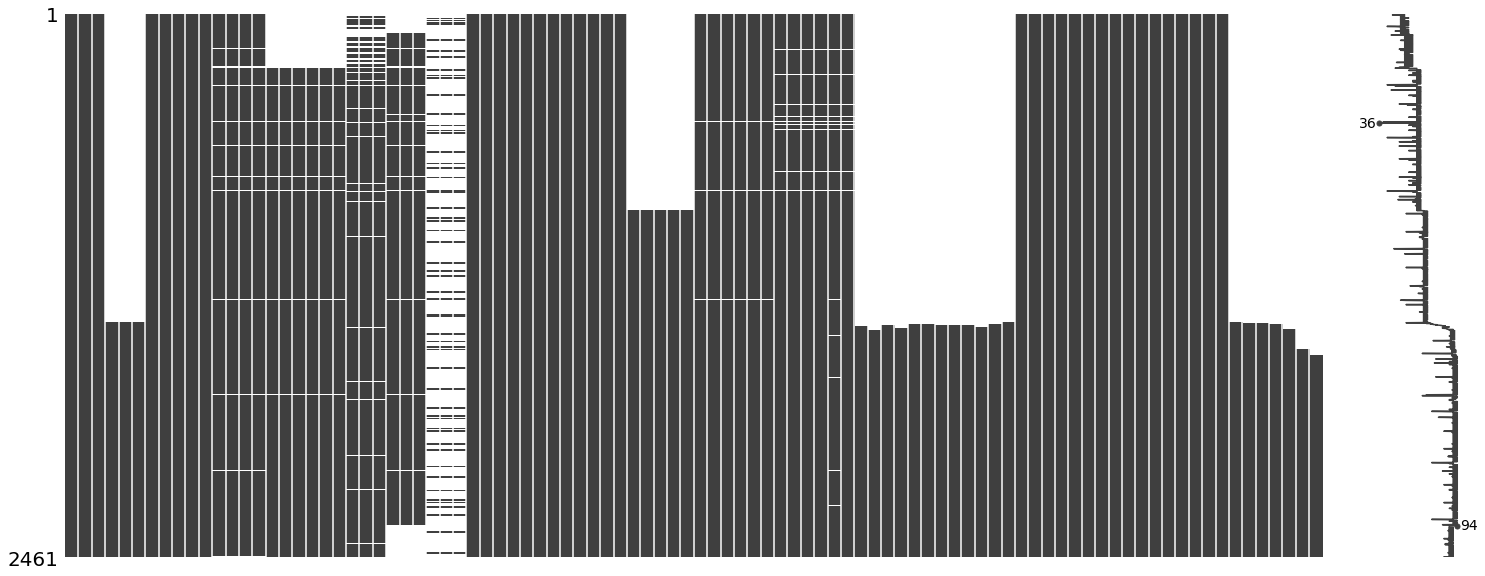

In [10]:
msno.matrix(data)
plt.show()

In [11]:
# data.close_kospi_volatility[~data.close_kospi_volatility.isnull()]

In [12]:
data.adjusted_price[~data.adjusted_price.isnull()]

Date
2015-09-02    2401.0
2015-09-03    2407.0
2015-09-04    2412.0
2015-09-07    2407.0
2015-09-08    2412.0
               ...  
2019-12-23    2400.0
2019-12-24    2470.0
2019-12-26    2510.0
2019-12-27    2590.0
2019-12-30    2625.0
Name: adjusted_price, Length: 1061, dtype: float64

In [13]:
data = data['2015-09-02':]

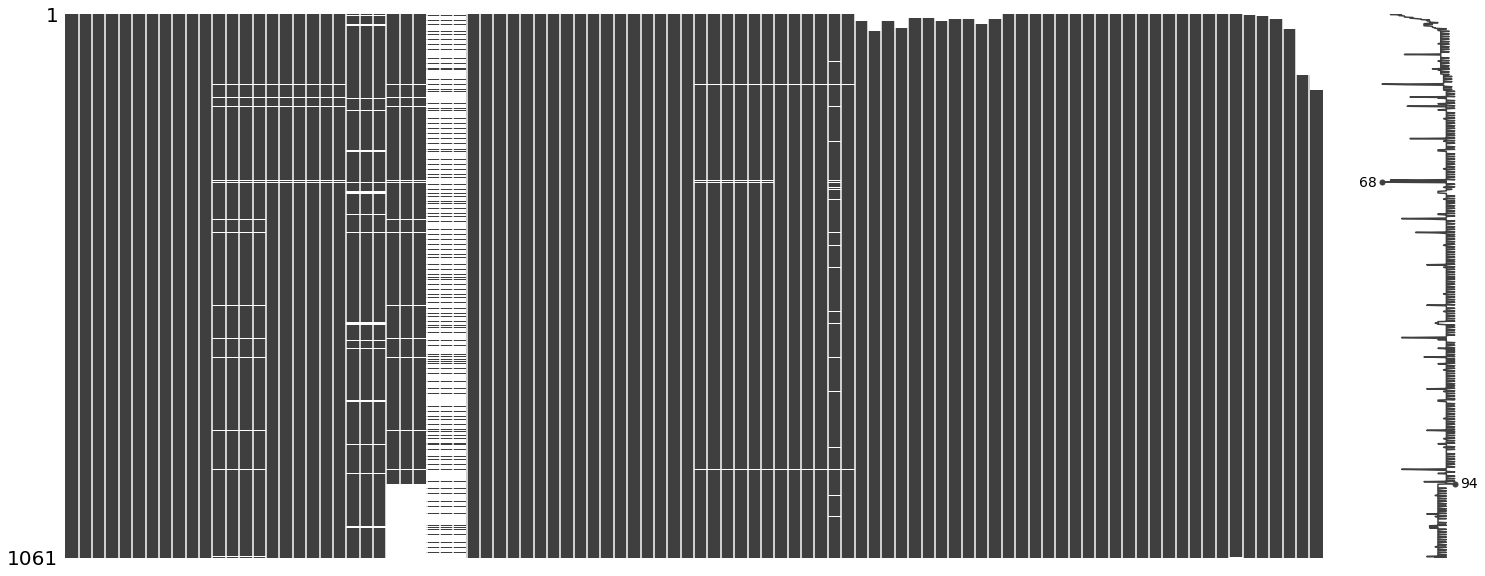

In [14]:
msno.matrix(data)
plt.show()

In [15]:
null_data = data.isnull().sum() / len(data) * 100
null_data

asset(1000)                  0.000000
debt(1000)                   0.000000
sales(1000)                  0.000000
adjusted_price               0.000000
volumne(mean_5d)(week)       0.000000
volumne(week)                0.000000
profit(1000)                 0.000000
term_profit(1000)            0.000000
gross_margin(1000)           0.000000
adjusted_BPS                 0.000000
adjusted_EPS                 0.000000
price_nickel                 2.262017
change_nickel                2.262017
%change_nickel               2.262017
stock_nickel                 2.262017
index_mineral                0.848256
change_mineral               0.848256
%change_mineral              0.848256
major_mineral                0.848256
major_change_mineral         0.848256
major_%chagne_mineral        0.848256
price_co_lithum              4.712535
change_co_lithum             4.712535
%change_co_lithum            4.712535
price_cobalt_LME            15.645617
change_cobalt_LME           15.645617
%change_coba

In [16]:
data.drop(['price_cobalt_rotterdam','change_cobalt_rotterdam','%change_cobalt_rotterdam'],axis=1,inplace=True)

In [17]:
data.loc[:,'price_nickel':'%change_cobalt_LME'] = data.loc[:,'price_nickel':'%change_cobalt_LME'].fillna(method='ffill')
data.loc[:,'last_brent':'adosc'] = data.loc[:,'last_brent':'adosc'].fillna(method='ffill')
# data.loc[:,'rsi_14':'adosc'] = data.loc[:,'last_brent':'adosc'].fillna(method='ffill')

In [18]:
data.isnull().sum() / len(data) * 100

asset(1000)                0.000000
debt(1000)                 0.000000
sales(1000)                0.000000
adjusted_price             0.000000
volumne(mean_5d)(week)     0.000000
volumne(week)              0.000000
profit(1000)               0.000000
term_profit(1000)          0.000000
gross_margin(1000)         0.000000
adjusted_BPS               0.000000
adjusted_EPS               0.000000
price_nickel               0.000000
change_nickel              0.000000
%change_nickel             0.000000
stock_nickel               0.000000
index_mineral              0.000000
change_mineral             0.000000
%change_mineral            0.000000
major_mineral              0.000000
major_change_mineral       0.000000
major_%chagne_mineral      0.000000
price_co_lithum            0.000000
change_co_lithum           0.000000
%change_co_lithum          0.000000
price_cobalt_LME           0.000000
change_cobalt_LME          0.000000
%change_cobalt_LME         0.000000
kospi                      0

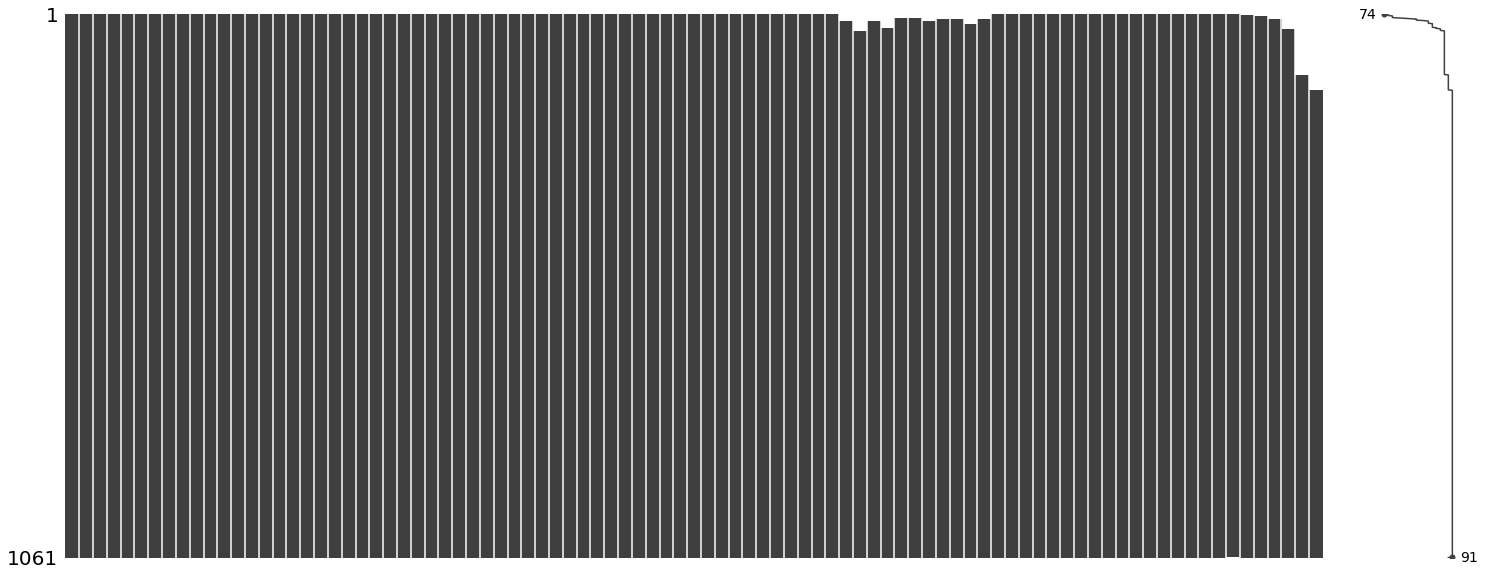

In [19]:
msno.matrix(data)
plt.show()

In [20]:
data[['profit_rate','adjusted_price']]

,profit_rate,adjusted_price
Date,,
2015-09-02,-0.688073,2401.0
2015-09-03,0.462963,2407.0
2015-09-04,0.231481,2412.0
2015-09-07,0.462963,2407.0
2015-09-08,0.462963,2412.0
...,...,...
2019-12-23,2.916667,2400.0
2019-12-24,1.619433,2470.0
2019-12-26,2.371542,2510.0


In [21]:
# 예측하고자 하는 독립변수에 대한 기술통계
data.profit_rate.describe()

count    1060.000000
mean        0.032256
std         2.639646
min       -17.166213
25%        -1.238135
50%         0.000000
75%         0.977997
max        29.618768
Name: profit_rate, dtype: float64

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


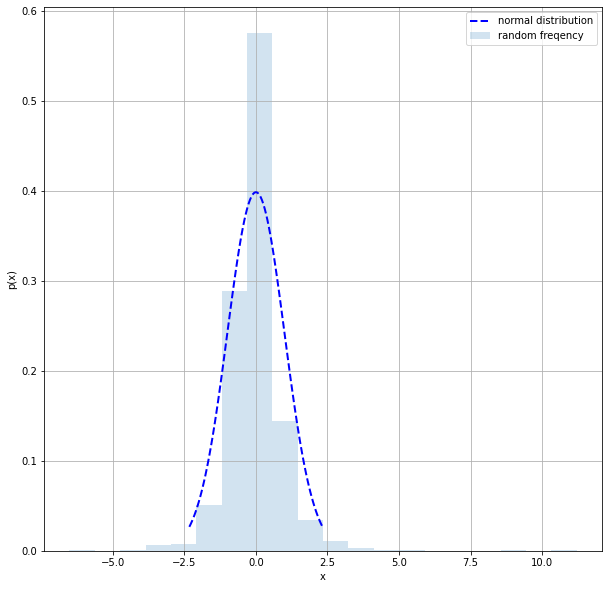

In [22]:
# 다음의 x 범위에서 표준 정규분포를 그릴 예정입니다.
x = np.linspace(stats.norm.ppf(.01), stats.norm.ppf(.99), 100) # x 범위 설정

fig = plt.figure(figsize=(10, 10))     # 플롯은 20 * 20 사이즈로 작성합니다.

# for 루프로 4개의 플롯을 작성하겠습니다.
# 정규분포 형태를 점선으로 표현
plt.plot(x, stats.norm.pdf(x), 'b--', lw=2, label='normal distribution')

# 발생한 난수의 히스토그램 작성
plt.hist((data.profit_rate-data.profit_rate.describe()['mean'])/data.profit_rate.describe()['std'], density=True, histtype='stepfilled', bins=20, alpha=.2, label='random freqency')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)
plt.show()

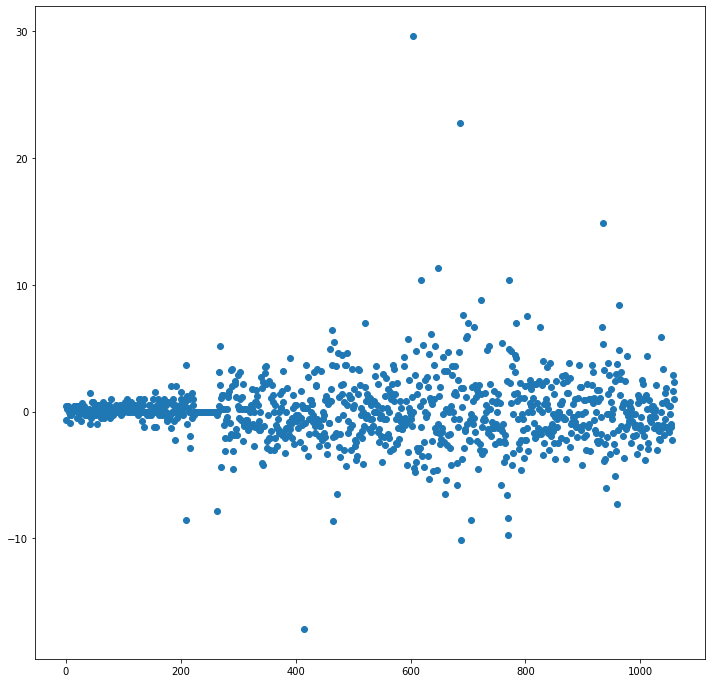

In [23]:
plt.figure(figsize=(12, 12))
x = data.profit_rate.values
plt.scatter(range(len(x)), x)
plt.show()

In [24]:
# 실수형인 종속변수를 범주형으로 바꾸기 위한 작업
def convert_target(x):
    THES = 0.2
    
    if x >= 8 * THES:
        return 2
    elif x >= THES and x < 8 * THES:
        return 1
    elif x >= (-THES) and x < THES:
        return 0
    elif x >= (-8*THES) and x < -THES:
        return -1
    else:
        return -2

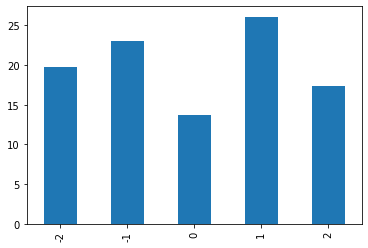

In [25]:
data['target'] = data['profit_rate'].map(convert_target)
target_ratio = data['target'].value_counts() / len(data['target']) * 100
target_ratio.sort_index().plot(kind='bar')
plt.show()

In [26]:
data.head()

,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,adjusted_EPS,price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,%change_mineral,major_mineral,major_change_mineral,major_%chagne_mineral,price_co_lithum,change_co_lithum,%change_co_lithum,price_cobalt_LME,change_cobalt_LME,%change_cobalt_LME,kospi,kosdaq,last_usd_krw,open_usd_krw,high_usd_krw,low_usd_krw,%change_usd_krw,last_korean_bond,open_korean_bond,high_korean_bond,low_korean_bond,%change_korean_bond,last_kospi_vol,open_kospi_vol,high_kospi_vol,low_kospi_vol,%change_kospi_vol,last_brent,open_brent,high_brent,low_brent,volume_brent,%change_brent,last_wti,open_wti,high_wti,low_wti,volume_wti,%change_wti,rsi_14,macd,cci,adx,stoch_slowk,stoch_slowd,willr,momentum,roc,ema20,adosc,obv,event1,event2,event3,event4,event5,event6,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150,target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-02,66880353.61,41078629.13,14385508.16,2401.0,3395211.0,3395211.0,1340183.31,1568145.83,4764766.93,522.97,32.05,9745.0,-195.0,-1.96,454044.0,1148.31,10.27,0.90,1161.20,12.57,1.09,44.0,0.0,0.0,28000.0,0.0,0.00,678.02,1915.22,1184.08,1180.48,1185.60,1175.73,0.34,1.886,1.905,1.914,1.886,-2.83,22.40,22.87,23.29,22.06,1.40,50.50,48.62,51.00,47.74,324.84,1.90,46.25,44.26,46.77,43.21,689.30,1.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3395211.0,-0.067437,0.087016,0.047856,0.173673,0.078027,0.050940,0.072024,-0.007986,0.135810,0.031947,-0.061986,-0.197883,0.107285,-0.140871,0.031497,-0.086687,-0.688073,NaN,NaN,NaN,NaN,NaN,NaN,-1
2015-09-03,66880353.61,41078629.13,14385508.16,2407.0,1795068.0,194925.0,1340183.31,1568145.83,4764766.93,522.97,32.05,10025.0,280.0,2.87,453678.0,1144.66,-3.65,-0.32,1157.63,-3.57,-0.31,44.0,0.0,0.0,27500.0,-500.0,-1.79,678.25,1915.53,1191.04,1183.95,1193.75,1182.82,0.59,1.885,1.894,1.897,1.869,-0.05,20.41,21.29,21.34,20.41,-8.88,50.68,50.58,52.46,49.82,270.54,0.36,46.75,46.11,48.42,45.65,539.45,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3590136.0,-0.065122,0.145690,0.082171,0.236010,0.100770,0.073722,0.081398,0.043799,0.148581,0.002714,-0.007482,-0.157856,0.128644,-0.132831,0.094527,-0.029896,0.462963,NaN,NaN,NaN,NaN,NaN,NaN,1
2015-09-04,66880353.61,41078629.13,14385508.16,2412.0,1245348.0,145908.0,1340183.31,1568145.83,4764766.93,522.97,32.05,9785.0,-240.0,-2.39,453630.0,1159.38,14.72,1.29,1176.97,19.33,1.67,44.0,0.0,0.0,28000.0,500.0,1.82,650.45,1886.04,1201.33,1190.57,1201.76,1187.25,0.86,1.838,1.875,1.889,1.838,-2.49,22.74,20.15,23.01,20.03,11.42,49.61,50.69,51.05,49.25,221.22,-2.11,46.05,46.68,47.23,45.61,385.63,-1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3736044.0,-0.049453,0.100100,0.067114,0.176069,0.087293,0.065579,0.103516,0.001276,0.148221,0.053803,-0.062989,-0.207869,0.120226,-0.139869,0.041923,-0.085210,0.231481,0.473983,NaN,NaN,NaN,NaN,NaN,1
2015-09-07,66880353.61,41078629.13,14385508.16,2407.0,940610.0,26397.0,1340183.31,1568145.83,4764766.93,522.97,32.05,9810.0,25.0,0.26,451962.0,1147.53,-11.85,-1.02,1164.95,-12.02,-1.02,44.0,0.0,0.0,27500.0,-500.0,-1.79,648.80,1883.22,1203.40,1201.42,1208.00,1197.88,0.17,1.841,1.832,1.851,1.830,-0.05,24.14,23.91,24.64,23.10,6.16,47.63,49.27,49.44,47.50,94.80,-3.99,44.70,45.72,45.92,44.15,385.63,-2.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3709647.0,-0.058455,0.064466,0.040677,0.160677,0.038460,0.029958,0.077792,0.003727,0.125900,0.044219,-0.063540,-0.182444,0.092232,-0.114136,0.019520,-0.068014,0.462963,0.002124,NaN,NaN,NaN,NaN,NaN,1
2015-09-08,66880353.61,41078629.13,14385508.16,2412.0,760548.0,40299.0,1340183.31,1568145.83,4764766.93,522.97,32.05,9850.0,40.0,0.41,451356.0,1144.81,-2.72,-0.24,1165.45,0.50,0.04,44.0,0.0,0.0,28500.0,1000.0,3.64,6

In [27]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
data.to_csv("data_2_{}.csv".format(company))